### Table of Contents

* [Two key things before EDA](#Two_key_things_before_EDA)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="section_1_1"></a>

#### Section 1.2 <a class="anchor" id="section_1_2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import missingno as msno
import seaborn as sns
sns.set()

In [2]:
loans_mpi = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/loans_mpi_DW.cvs',parse_dates=['posted_time', 'funded_time'])

In [3]:
loans_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671204 entries, 0 to 671203
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  671204 non-null  int64         
 1   funded_amount       671204 non-null  float64       
 2   loan_amount         671204 non-null  float64       
 3   activity            671204 non-null  object        
 4   sector              671204 non-null  object        
 5   use                 671204 non-null  object        
 6   ISO                 671204 non-null  object        
 7   country             671204 non-null  object        
 8   partner_id          671204 non-null  object        
 9   posted_time         671204 non-null  datetime64[ns]
 10  funded_time         622873 non-null  datetime64[ns]
 11  term_in_months      671204 non-null  float64       
 12  lender_count        671204 non-null  int64         
 13  tags                671204 no

In [4]:
loans_mpi.head()

,id,funded_amount,loan_amount,activity,sector,use,ISO,country,partner_id,posted_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,fully_funded_days,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PAK,Pakistan,With_partner,2014-01-01 06:12:39,2014-01-02 10:06:32,12.0,12,No_tag,female,irregular,1.162419,South Asia,0.230320
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PAK,Pakistan,With_partner,2014-01-01 06:51:08,2014-01-02 09:17:23,11.0,14,No_tag,female,irregular,1.101562,South Asia,0.230320
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IND,India,With_partner,2014-01-01 09:58:07,2014-01-01 16:01:36,43.0,6,"user_favorite, user_favorite",female,bullet,0.252419,South Asia,0.191099
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PAK,Pakistan,With_partner,2014-01-01 08:03:11,2014-01-01 13:00:00,11.0,8,No_tag,female,irregular,0.206123,South Asia,0.230320
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PAK,Pakistan,With_partner,2014-01-01 11:53:19,2014-01-01 19:18:51,14.0,16,No_tag,female,monthly,0.309398,South Asia,0.230320


Before EDA, there are two key things need to be done first:
* The first is to compare the loans from the US and the other loans
* The second is to define target feature.

## Two key things before EDA <a id="Two_key_things_before_EDA"></a>

### The US related countries and other countries

In [5]:
usa_related = ['United States', 'Virgin Islands', 'Guam', 'Puerto Rico']
loans_usa = loans_mpi[loans_mpi.country.apply(lambda x: x in usa_related)]
loans_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 99 to 670914
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  6163 non-null   int64         
 1   funded_amount       6163 non-null   float64       
 2   loan_amount         6163 non-null   float64       
 3   activity            6163 non-null   object        
 4   sector              6163 non-null   object        
 5   use                 6163 non-null   object        
 6   ISO                 6163 non-null   object        
 7   country             6163 non-null   object        
 8   partner_id          6163 non-null   object        
 9   posted_time         6163 non-null   datetime64[ns]
 10  funded_time         3943 non-null   datetime64[ns]
 11  term_in_months      6163 non-null   float64       
 12  lender_count        6163 non-null   int64         
 13  tags                6163 non-null   object   

In [6]:
loans_others = loans_mpi.drop(index=loans_usa.index)
loans_others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665041 entries, 0 to 671203
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  665041 non-null  int64         
 1   funded_amount       665041 non-null  float64       
 2   loan_amount         665041 non-null  float64       
 3   activity            665041 non-null  object        
 4   sector              665041 non-null  object        
 5   use                 665041 non-null  object        
 6   ISO                 665041 non-null  object        
 7   country             665041 non-null  object        
 8   partner_id          665041 non-null  object        
 9   posted_time         665041 non-null  datetime64[ns]
 10  funded_time         618930 non-null  datetime64[ns]
 11  term_in_months      665041 non-null  float64       
 12  lender_count        665041 non-null  int64         
 13  tags                665041 no

#### Comparing loan amount

       loan_amount_usa  loan_amount_others
count      6163.000000       665041.000000
mean       5172.817621          802.264936
std        2977.641363         1092.042294
min         125.000000           25.000000
25%        2750.000000          275.000000
50%        5000.000000          500.000000
75%        7000.000000          975.000000
max       10000.000000       100000.000000


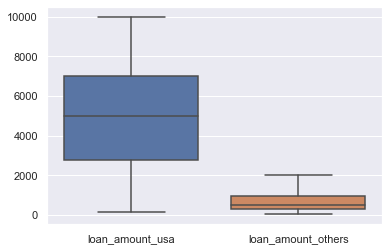

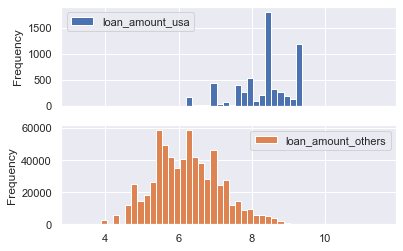

In [7]:
loan_amount_usa = loans_usa.loan_amount.to_frame()
loan_amount_others = loans_others.loan_amount.to_frame()
loan_amount_comp = loan_amount_usa.join(loan_amount_others, how='outer', lsuffix='_usa', rsuffix='_others')
print(loan_amount_comp.describe())

_ = sns.boxplot(data = loan_amount_comp, showfliers=False)
_ = np.log(loan_amount_comp).plot(subplots=True, kind='hist', bins=50)

#### Comparing partner

In [8]:
loans_usa.partner_id.value_counts(normalize=True)

No_partner      0.833036
With_partner    0.166964
Name: partner_id, dtype: float64

In [9]:
loans_others.partner_id.value_counts(normalize=True)

With_partner    0.987411
No_partner      0.012589
Name: partner_id, dtype: float64

#### Comparing funded time

In [10]:
loans_usa.funded_time.isna().mean()

0.3602141814051598

In [11]:
loans_others.funded_time.isna().mean()

0.06933557479914772

#### Comparing MPI

In [12]:
loans_usa.MPI.isna().mean()

1.0

In [13]:
loans_others.MPI.isna().mean()

0.054351536221075095

As we can see above, there are big differences between the loans from the USA related countries and the loans from other countries. In this project, we will focus on the countries outside the USA related countries. So **all the loans from the USA related countries will be removed**, i.e., `loans_others` will be kept for EDA and modeling.

### Defining target future

The object of this project is to answer the following question: Can we build a machine learning model that can accurately predict if a loan will get at least $X fund amount per day on average in the 30-day period when it is posted on the Kiva crowdfunding website?

#### Target feature definition

In [14]:
loans_others.loc[:, 'funded_speed'] = round(loans_others.funded_amount / loans_others.fully_funded_days, 1)
loans_others.funded_speed.describe()

count    618933.000000
mean        170.297536
std        1248.523959
min           0.200000
25%          22.900000
50%          45.200000
75%         104.000000
max      227368.400000
Name: funded_speed, dtype: float64

#### Target feature distribution

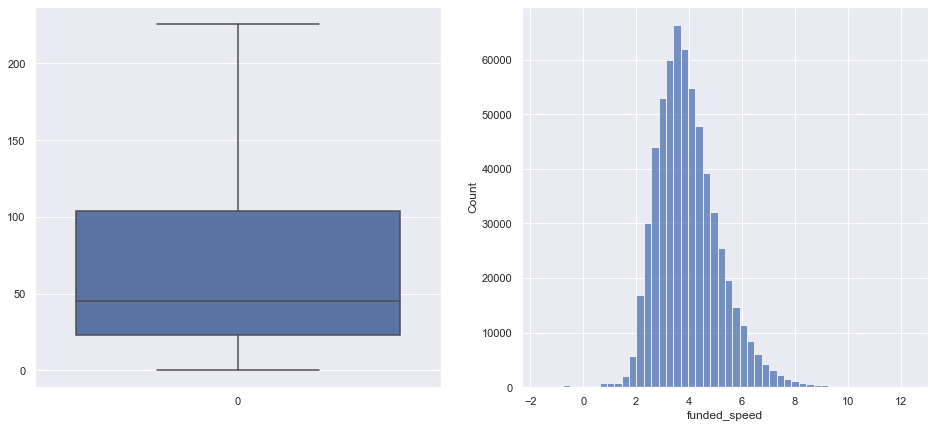

In [15]:
fig, axes = plt.subplots(1,2, figsize=(16,7))
sns.boxplot(data = loans_others.funded_speed, showfliers=False, ax=axes[0])
_ = sns.histplot(data = np.log(loans_others.funded_speed), ax=axes[1], bins=50)

## The loans

### The loan amount and funded amount:

#### Loan amount distribution

In [16]:
loans_others[['loan_amount', 'funded_amount']].describe()

,loan_amount,funded_amount
count,665041.000000,665041.000000
mean,802.264936,758.005980
std,1092.042294,1049.631991
min,25.000000,0.000000
25%,275.000000,250.000000
50%,500.000000,450.000000
75%,975.000000,875.000000
max,100000.000000,100000.000000


The mean and median of `funded_amount` and `loan_amount` are less than \$1000, while the maximum is up high to \\$100,000, which means `funded_amount` and `loan_amount` are both right skewed. We will check the log distribution of the both variables.

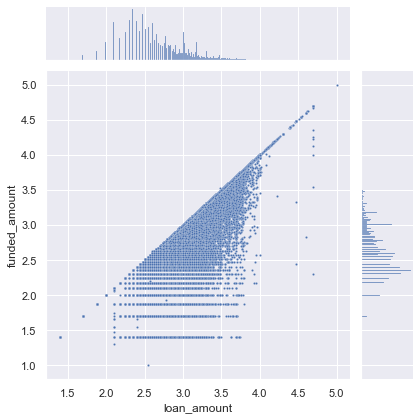

In [17]:
# Take the logarithm of funded amount 
# Zero value will lead to negtive infinit when taking logarithm
funded_amount_log = np.log10(loans_others[loans_others.funded_amount != 0].funded_amount)

# Take the logarithm of loan amount with non-zero funded amount
loan_amount_log = np.log10(loans_others[loans_others.funded_amount != 0].loan_amount)

# The relationship of loan anoumt and funded amount
_ = sns.jointplot(x=loan_amount_log, y=funded_amount_log, joint_kws=dict(s=5))

The distribution looks much better when taking logarithm. All the data points under the diagonal mean the not-fully-funded loans. Actually, not-fully-funded rate is fairly low on Kiva platform. Let's check it.

In [18]:
loans_others.funded_time.isna().mean()

0.06933557479914772

#### Funded amount and lender count

[[1.         0.85379525]
 [0.85379525 1.        ]]


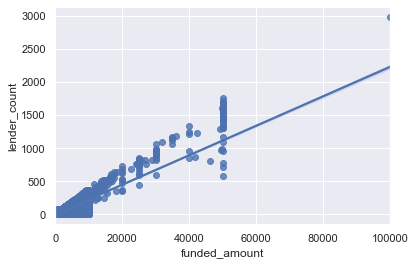

In [19]:
print(np.corrcoef(loans_others.funded_amount, loans_others.lender_count))

_ = sns.regplot(x='funded_amount', y='lender_count', data=loans_others)

### Country and world region

#### Country

In [20]:
len(loans_others.country.unique())

83

##### Number of loans by country

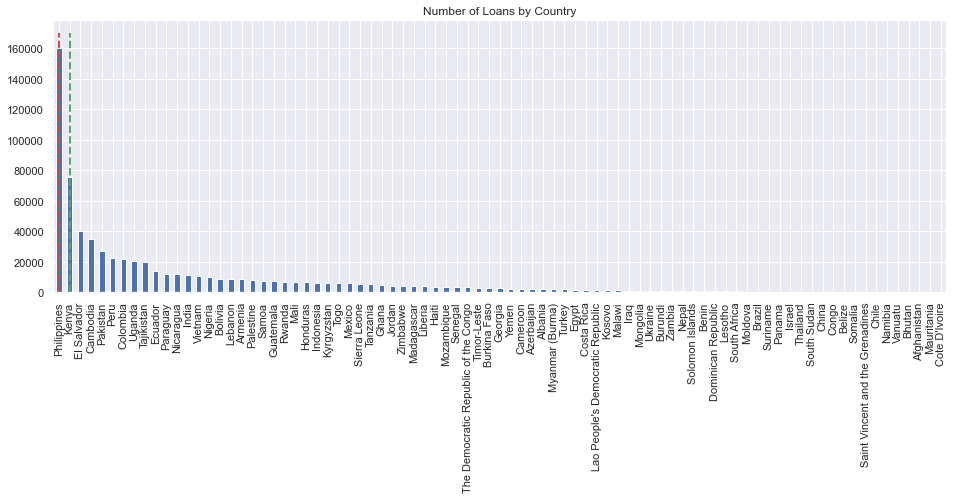

In [21]:
loan_count_by_country = loans_others.country.value_counts()
loan_count_by_country.plot.bar()
plt.gcf().set_size_inches(16, 5)
plt.title('Number of Loans by Country')
plt.vlines(x=np.array([0]), ymin=0, ymax=170000, color='r', linewidths=2, linestyles='dashed')
_ = plt.vlines(x=np.array([1]), ymin=0, ymax=170000, color='g', linewidths=2, linestyles='dashed')

#### Total loan amount by country

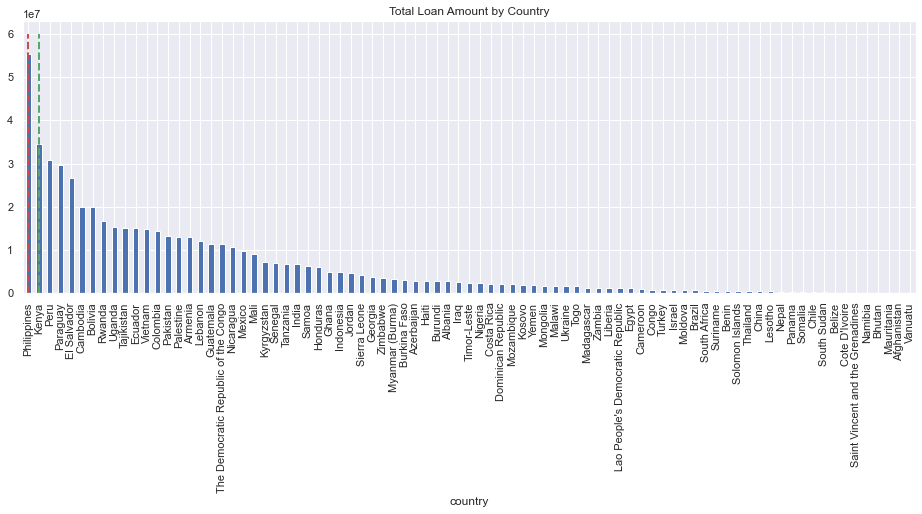

In [22]:
# Check the total loan amount by country
amount_sum_by_country = loans_others.groupby('country').sum()['loan_amount'].sort_values(ascending=False)

# Plot the total loan amount by country
amount_sum_by_country.plot.bar()
plt.gcf().set_size_inches(16, 5)
plt.title('Total Loan Amount by Country')
plt.vlines(x=np.array([0]), ymin=0, ymax=6e7, color='r', linewidths=2, linestyles='dashed')
_ = plt.vlines(x=np.array([1]), ymin=0, ymax=6e7, color='g', linewidths=2, linestyles='dashed')

#### Average loan amount by country

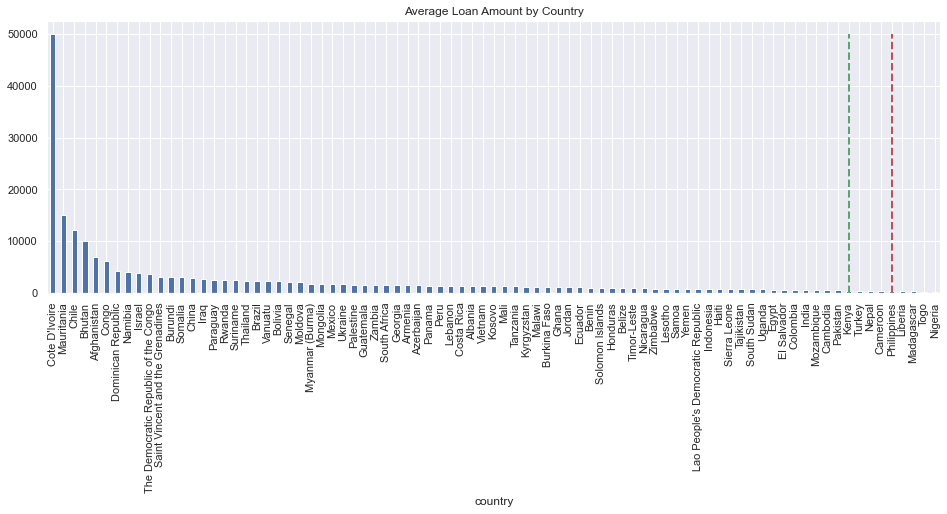

In [23]:
# Check the average loan amount by country
amount_mean_by_country = loans_others.groupby('country').mean()['loan_amount'].sort_values(ascending=False)

# Plot the average loan amount by country
amount_mean_by_country.plot.bar()
plt.gcf().set_size_inches(16, 5)
plt.title('Average Loan Amount by Country')
plt.vlines(x=np.array([78]), ymin=0, ymax=50000, color='r', linewidths=2, linestyles='dashed')
_ = plt.vlines(x=np.array([74]), ymin=0, ymax=50000, color='g', linewidths=2, linestyles='dashed')

#### World region

##### Number of loans by world region

In [24]:
loans_others.world_region.value_counts()

East Asia and the Pacific      227612
Sub-Saharan Africa             171324
Latin America and Caribbean    156248
Europe and Central Asia         44896
South Asia                      38815
Arab States                     26146
Name: world_region, dtype: int64

##### Number of countries by world region

In [25]:
loans_others.groupby('world_region').country.unique().apply(lambda x: len(x)).sort_values(ascending=False)

world_region
Sub-Saharan Africa             28
Latin America and Caribbean    19
East Asia and the Pacific      13
Europe and Central Asia        11
Arab States                     7
South Asia                      5
Name: country, dtype: int64

##### Loan amount by world region

                             loan_amount_sum  loan_amount_mean
world_region                                                  
Latin America and Caribbean      182988375.0       1366.939494
Sub-Saharan Africa               133393375.0        487.875639
East Asia and the Pacific        111046350.0       1113.849229
Europe and Central Asia           50007375.0       1171.140591
Arab States                       35740000.0        524.632230
South Asia                        20363600.0        778.602969


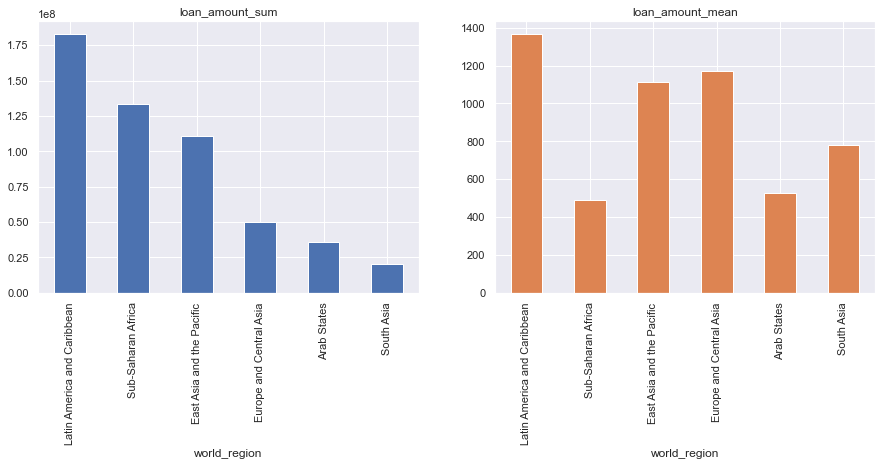

In [26]:
# Total loan amount and average loan amount by gender

amount_sum_by_region = loans_others.groupby('world_region').sum().loan_amount.sort_values(ascending=False).to_frame().reset_index()

amount_mean_by_region = loans_others.groupby('world_region').mean().loan_amount.to_frame().set_index(amount_sum_by_region.index)
# Join two dataframe and rename
loan_by_region = amount_sum_by_region.join(amount_mean_by_region, how='outer', lsuffix='_sum', rsuffix='_mean').set_index('world_region', drop=True)
print(loan_by_region)

# Plot and compare
axes = loan_by_region.plot.bar(subplots=True, layout=(1, 2), legend=None)
plt.gcf().set_size_inches(15,5)


### Sector and activity

#### Sector 

In [27]:
loans_others.sector.value_counts()

Agriculture       179886
Food              135438
Retail            123559
Services           43119
Personal Use       36307
Housing            33685
Clothing           32316
Education          30832
Transportation     15386
Arts               11769
Health              9147
Construction        6173
Manufacturing       6168
Entertainment        643
Wholesale            613
Name: sector, dtype: int64

#### Sector and activity

In [28]:
loans_others.groupby('sector').activity.value_counts()

sector          activity          
Agriculture     Farming               72953
                Pigs                  26624
                Agriculture           26612
                Livestock             13095
                Poultry                9783
                                      ...  
Transportation  Transportation         4003
                Rickshaw               2878
                Taxi                   2618
Wholesale       Wholesale               347
                Goods Distribution      266
Name: activity, Length: 163, dtype: int64

There are totally 15 sectors with 163 activity types. The most common sector is Agriculture, and the most common activity is Farming, which belongs to Agriculture sector. We will check the relationships between sector and loan amount as well as country.

#### Sector and loan amount

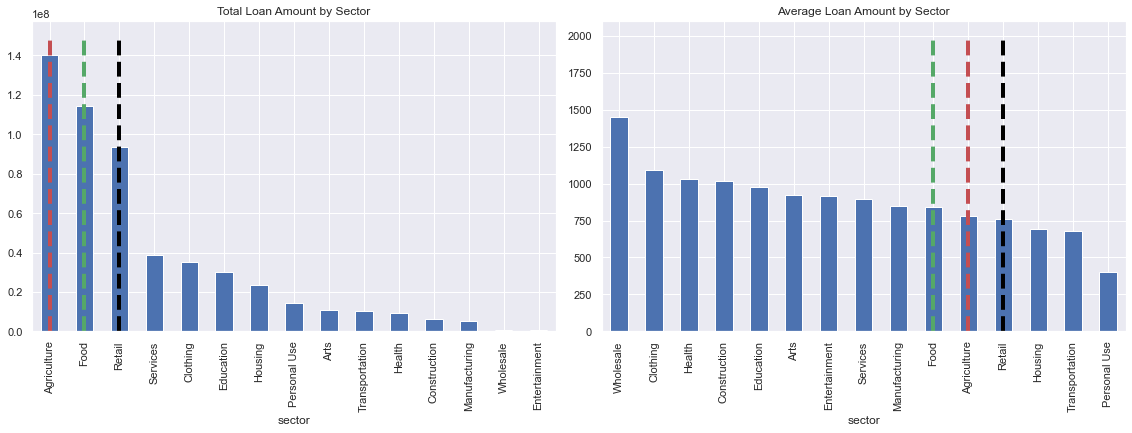

In [29]:
# Check the total loan amount and average loan amount by sector
amount_sum_by_sector = loans_others.groupby('sector').sum().loan_amount.sort_values(ascending=False)
amount_mean_by_sector = loans_others.groupby('sector').mean().loan_amount.sort_values(ascending=False)


# Plot the total loan amount and average loan amount by country
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.tight_layout()

amount_sum_by_sector.plot.bar(ax=axes[0])
axes[0].set_title('Total Loan Amount by Sector')
axes[0].vlines(x=np.array([0]), ymin=0, ymax=1.5e8, color='r', linewidths=4, linestyles='dashed')
axes[0].vlines(x=np.array([1]), ymin=0, ymax=1.5e8, color='g', linewidths=4, linestyles='dashed')
axes[0].vlines(x=np.array([2]), ymin=0, ymax=1.5e8, color='black', linewidths=4, linestyles='dashed')

amount_mean_by_sector.plot.bar(ax=axes[1])
axes[1].set_title('Average Loan Amount by Sector')
axes[1].vlines(x=np.array([10]), ymin=0, ymax=2000, color='r', linewidths=4, linestyles='dashed')
axes[1].vlines(x=np.array([9]), ymin=0, ymax=2000, color='g', linewidths=4, linestyles='dashed')
_ = axes[1].vlines(x=np.array([11]), ymin=0, ymax=2000, color='black', linewidths=4, linestyles='dashed')

#### Sector and country

In [30]:
loans_others.groupby('sector').country.value_counts()

sector       country        
Agriculture  Philippines        36776
             Kenya              33644
             El Salvador        14009
             Cambodia           10559
             Peru                6589
                                ...  
Wholesale    Samoa                  1
             Solomon Islands        1
             South Africa           1
             Ukraine                1
             Yemen                  1
Name: country, Length: 962, dtype: int64

### Use of loans

`use` describes the use of loans in detail, through which the lenders can get to know about how the loans will be used. We can check some samples of loans to take a look at `use`.

#### The use of loans in agriculture sector

In [31]:
# The sample of loans under Entertainment sector
pd.set_option('display.max_colwidth', None)
loans_others[loans_others.sector=='Agriculture'].use.sample(10)

386510                                                to buy fertilizer and pesticide to support her cassava plantation.
540576                                                                       to buy medicines and vaccines for her pigs.
623814                                                                                                      to buy pigs.
592377    to purchase a solar light and gain access to cost-efficient hybrid seeds and fertilizer for maize cultivation.
654477                                                                                   to buy coffee seeds and compost
242650                                                                                         to buy piglets to raise. 
358796                                   to buy cost efficient maize seeds and fertilizer for the coming growing season.
276712                            to purchase sulfate, formulas, insecticide, fertilizer spray, pay day laborers, etc...
126025                          

We can see that loans in agriculture sector are generally used to buy livestocks, seeds, fertilizers, and so on.

#### The use of loans in entertainment sector

In [32]:
# The activities under the Entertainment sector
loans_others[loans_others.sector=='Entertainment'].activity.value_counts()

Entertainment          265
Games                  237
Musical Performance    141
Name: activity, dtype: int64

In [33]:
# The sample of loans under Entertainment sector
pd.set_option('display.max_colwidth', None)
loans_others[loans_others.sector=='Entertainment'].use.sample(10)

89457                                                                   to purchase new musical instruments for her husband.
299034             to buy a bingo machine, a box of paper bingo cards, a box of ink bottles, a TV screen, and a loudspeaker.
659127                                                                                                 to buy a better piano
101211                                                To purchase musical instruments for her husband's party band business.
24291                                             To buy an extra television and video player for her entertainment business
276335                                         to purchase loudspeakers to provide musical performances for different events
482435                                             To buy another unit of videoke machine to have a bigger source of income.
551648                                                          to pay for new speakers to better organize his performances.


### Borrower Genders

#### Borrower gender groups

We have grouped borrower genders in data wrangling, so there are four groups of borrowers by gender, i.e., female, male, mixed, and unknown. Let's check the number of loans by borrower gender groups

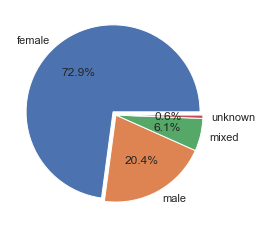

In [34]:
# The number of loans by borrower gender
labels = loans_others.borrower_genders.value_counts().index
sizes = loans_others.borrower_genders.value_counts()
explode = (0.05, 0, 0, 0)  
_ = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')

Most loan borrowers came from female group, including single female and multiple females. What about the relationship between the borrower gender and loan amount 

#### Borrower gender groups by loan amount

                  loan_amount_sum  loan_amount_mean
borrower_genders                                   
female                339237475.0        699.907518
male                  113076650.0        831.978177
mixed                  76997250.0       1906.863716
unknown                 4227700.0       1041.305419


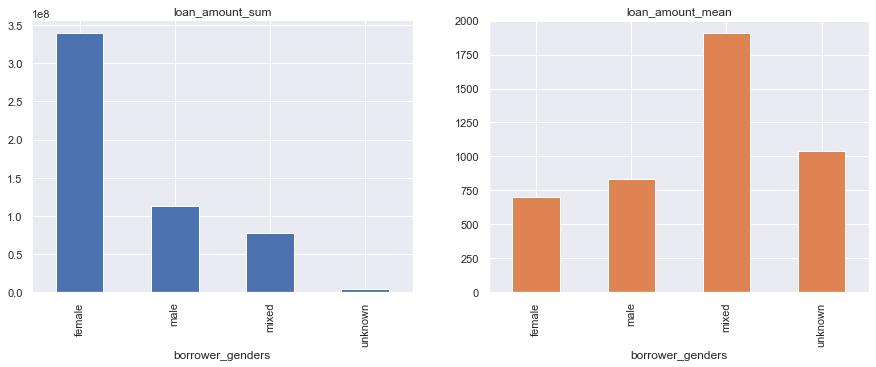

In [35]:
# Total loan amount and average loan amount by gender
sum_by_gender = loans_others.groupby('borrower_genders').sum().loan_amount.to_frame()
mean_by_gender = loans_others.groupby('borrower_genders').mean().loan_amount.to_frame()
# Join two dataframe and rename
loan_by_gender = sum_by_gender.join(mean_by_gender, how='outer', lsuffix='_sum', rsuffix='_mean')
print(loan_by_gender)

# Plot and compare
axes = loan_by_gender[['loan_amount_sum', 'loan_amount_mean']].plot.bar(subplots=True, layout=(1, 2), legend=None)
plt.gcf().set_size_inches(15,5)

The total amount of loans borrowed from female group was much larger than the other gender groups, but the average loan amount of female group was the smallest one.

### Term in months

#### Term in months distribution

count    665041.000000
mean         13.616170
std           8.501051
min           1.000000
25%           8.000000
50%          13.000000
75%          14.000000
max         158.000000
Name: term_in_months, dtype: float64


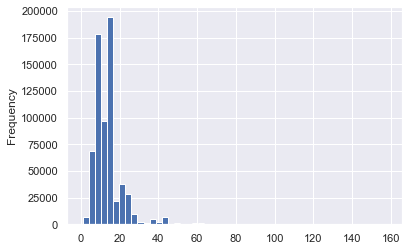

In [36]:
print(loans_others.term_in_months.describe())
_ = loans_others.term_in_months.plot.hist(bins=50)

#### Term in months and loan amount

##### Term in months and loan amount in other countries

[[1.         0.13066742]
 [0.13066742 1.        ]]


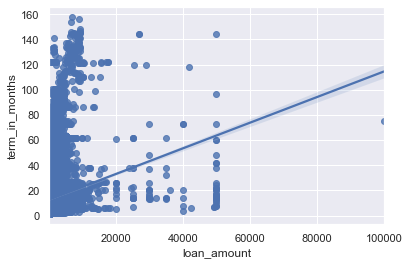

In [37]:
_ = sns.regplot(x=loans_others.loan_amount, y=loans_others.term_in_months)
print(np.corrcoef(loans_others.loan_amount, loans_others.term_in_months))

##### Term in months in the USA related country

[[1.         0.71121117]
 [0.71121117 1.        ]]


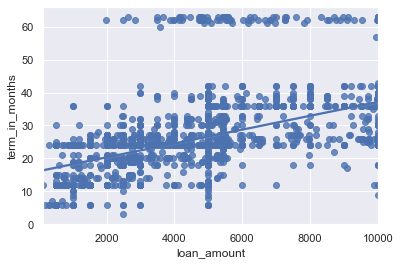

In [38]:
print(np.corrcoef(loans_usa.loan_amount, loans_usa.term_in_months))
_ = sns.regplot(x=loans_usa.loan_amount, y=loans_usa.term_in_months)

[[1.         0.79310516]
 [0.79310516 1.        ]]


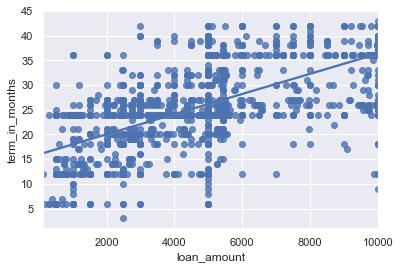

In [39]:
loans_usa_short_term = loans_usa[loans_usa.term_in_months < 50]
print(np.corrcoef(loans_usa_short_term.loan_amount, loans_usa_short_term.term_in_months))
_ = sns.regplot(x=loans_usa_short_term.loan_amount, y=loans_usa_short_term.term_in_months)

#### Loan amount per month by country

In [40]:
loans_others.loc[:, 'loan_amount_per_month'] = round(loans_others.loan_amount / loans_others.term_in_months)
loans_others.loan_amount_per_month.describe()

count    665041.000000
mean         72.624767
std         127.508275
min           0.000000
25%          25.000000
50%          39.000000
75%          68.000000
max       10000.000000
Name: loan_amount_per_month, dtype: float64

[array([25.,  0.]), array([ 68., 132.])]

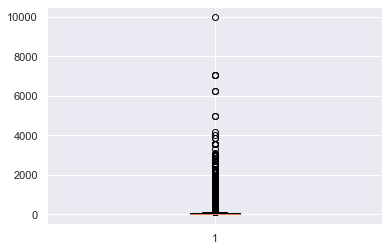

In [41]:
B = plt.boxplot(loans_others.loan_amount_per_month)
[item.get_ydata() for item in B['whiskers']]

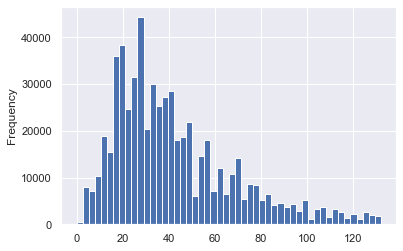

In [42]:
loans_others[loans_others.loan_amount_per_month < 133].loan_amount_per_month.plot.hist(bins=50)

### Repayment interval

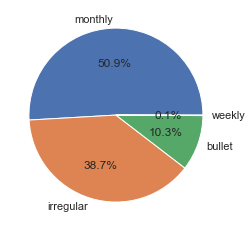

In [43]:
# Repayment interval distribution
labels = loans_others.repayment_interval.value_counts().index
sizes = loans_others.repayment_interval.value_counts()
_ = plt.pie(sizes, labels=labels, autopct='%1.1f%%')

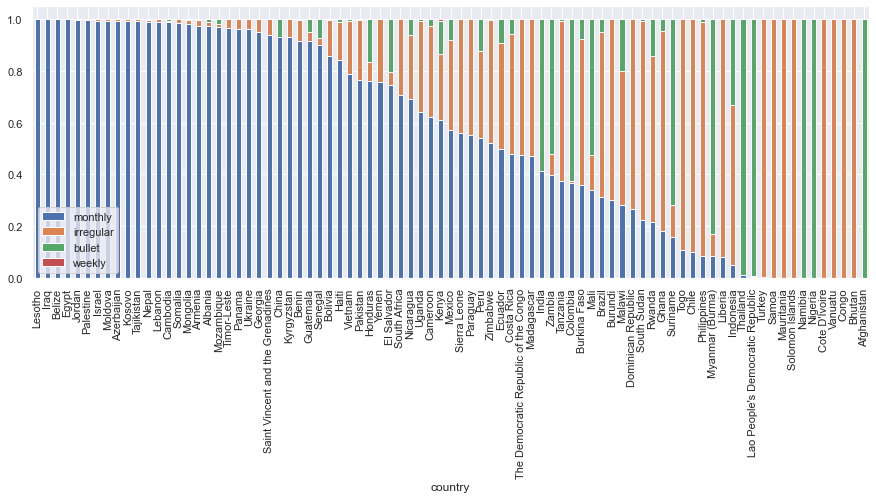

In [44]:
# Repayment interval distribution by country
repayment = loans_others.groupby(['country', 'repayment_interval']).size().unstack(fill_value=0)
repayment['loans_number'] = loans_others.groupby('country').count().loan_amount

# Calculate the proportion of different repayment methods and adjust the position of the columns
repayment_prop = repayment.iloc[:, [2,1,0,3]].div(repayment.loans_number, axis=0).sort_values(by='monthly', ascending=False)

# Plot the proportion by country
repayment_prop.plot(kind='bar', stacked=True)
plt.legend(loc='lower left')
plt.gcf().set_size_inches(15, 5)

### MPI

#### MPI distribution

In [45]:
loans_others.MPI.describe()

count    628895.000000
mean          0.124640
std           0.115941
min           0.001155
25%           0.052128
50%           0.053851
75%           0.187418
max           0.557405
Name: MPI, dtype: float64

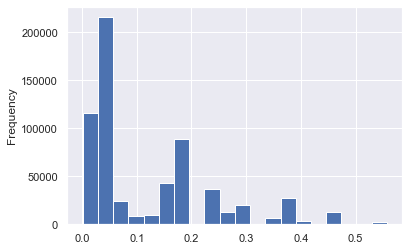

In [46]:
loans_others.MPI.plot.hist(bins=20)

#### MPI and the median of loan amount by country

In [47]:
loan_count_mpi = loans_others.groupby('country').count().id.to_frame()
loan_amount_median_mpi = loans_others.groupby('country').median()[['loan_amount','loan_amount_per_month','MPI']]
loan_mpi = loan_count_mpi.join(loan_amount_median_mpi).rename({'id':'loan_count','loan_amount':'loan_amount_median','loan_amount_per_month':'loan_amount_per_month_median'}, axis=1)
loan_mpi

,loan_count,loan_amount_median,loan_amount_per_month_median,MPI
country,,,,
Afghanistan,2,7000.0,1041.5,0.295269
Albania,1934,1225.0,55.0,0.005147
Armenia,8631,1475.0,52.0,0.001155
Azerbaijan,1945,1450.0,85.0,0.020960
Belize,125,625.0,19.0,0.018282
...,...,...,...,...
Vanuatu,4,2262.5,61.0,0.128640
Vietnam,10843,900.0,64.0,0.029003
Yemen,2313,700.0,50.0,0.235676


In [48]:
loan_mpi.describe()

,loan_count,loan_amount_median,loan_amount_per_month_median,MPI
count,83.000000,83.000000,83.000000,71.000000
mean,8012.542169,2255.421687,195.584337,0.173927
std,20121.825619,5738.999018,570.383417,0.156004
min,1.000000,150.000000,9.000000,0.001155
25%,459.000000,587.500000,41.000000,0.027593
50%,2409.000000,1000.000000,64.000000,0.146371
75%,7022.500000,1812.500000,125.000000,0.284601
max,160441.000000,50000.000000,5000.000000,0.557405


[array([459.,   1.]), array([ 7022.5, 13521. ])]

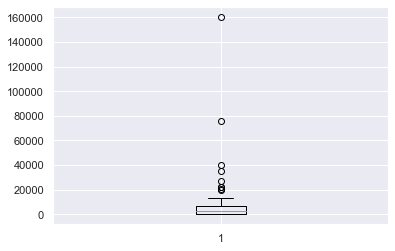

In [49]:
B = plt.boxplot(loan_mpi.loan_count)
[item.get_ydata() for item in B['whiskers']]

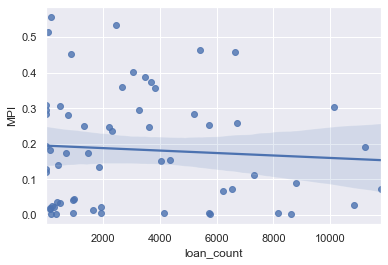

In [50]:
loan_count_low_mpi = loan_mpi[(loan_mpi.loan_count < 13045) & (loan_mpi.MPI > 0)]
sns.regplot(x='loan_count', y='MPI', data=loan_count_low_mpi)

In [51]:
np.corrcoef(loan_count_low_mpi.loan_count, loan_count_low_mpi.MPI)

array([[ 1.        , -0.07093334],
       [-0.07093334,  1.        ]])

[array([587.5, 150. ]), array([1812.5, 3150. ])]

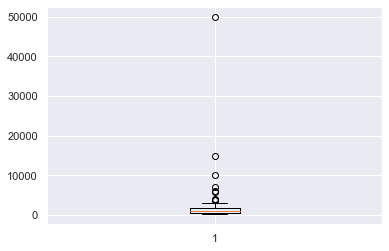

In [52]:
B = plt.boxplot(loan_amount_median_mpi.loan_amount)
[item.get_ydata() for item in B['whiskers']]

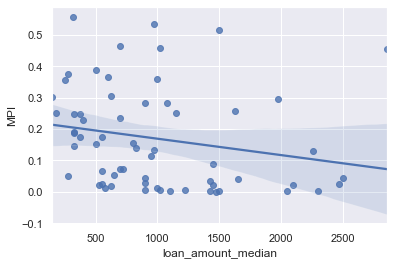

In [53]:
loan_amount_median_low_mpi = loan_mpi[(loan_mpi.loan_amount_median < 3025) & (loan_mpi.MPI > 0)]
sns.regplot(x='loan_amount_median', y='MPI', data= loan_amount_median_low_mpi)

In [54]:
np.corrcoef(loan_amount_median_low_mpi.loan_amount_median, loan_amount_median_low_mpi.MPI)

array([[ 1.        , -0.21217142],
       [-0.21217142,  1.        ]])

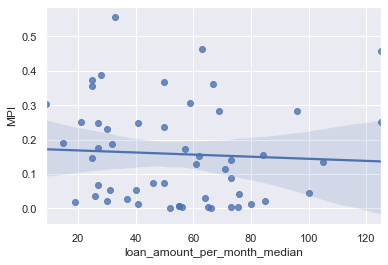

In [55]:
loan_amount_per_month_median_low_mpi = loan_mpi[(loan_mpi.loan_amount_per_month_median < 133) & (loan_mpi.MPI > 0)]
sns.regplot(x='loan_amount_per_month_median', y='MPI', data=loan_amount_per_month_median_low_mpi)

In [56]:
np.corrcoef(loan_amount_per_month_median_low_mpi.loan_amount_per_month_median, loan_amount_per_month_median_low_mpi.MPI)

array([[ 1.       , -0.0564236],
       [-0.0564236,  1.       ]])

#### Missing values of MPI

In [81]:
country_wo_mpi = loans_others[loans_others.MPI.isna()].country.unique()
country_wo_mpi

array(['Chile', 'Georgia', 'Kosovo', 'Costa Rica', 'Turkey', 'Paraguay',
       'Lebanon', 'Samoa', 'Israel', 'Panama',
       'Saint Vincent and the Grenadines', 'Solomon Islands'],
      dtype=object)

In [82]:
loans_others.MPI.isna().mean()

0.05397823383564924

About 5% of the loans came from the countries without MPI value, most of which are developing countries except Israel. The entries of these loans will be dropped before saving the file.

### Posted time, funded time, and fully-funded days

In [58]:
# Build a new dataframe 
loans_posted = loans_others[['loan_amount', 'funded_amount', 'country', 'posted_time', 'funded_time', 'fully_funded_days']].set_index('posted_time', drop=False)

In [59]:
# Resample the time by month and calculate the number of loans
loans_monthly_count = loans_posted.resample('M', on='posted_time').count()[['posted_time', 'funded_time']]
loans_monthly_count.rename(columns={'posted_time': 'loans_posted','funded_time': 'loans_fully_funded'}, inplace=True)

# Add proportion of fully-funded loans number to posted loan number
loans_monthly_count['fully_funded_prop'] = round(loans_monthly_count.loans_fully_funded / loans_monthly_count.loans_posted, 2)
# Add proportion of missing funded_time number  to posted loan number, which euals one minus fully-funded loans proportion
loans_monthly_count['missing_funded_time_prop'] = loans_posted.funded_time.isna().resample('M').sum().div(loans_monthly_count.loans_posted).round(2)

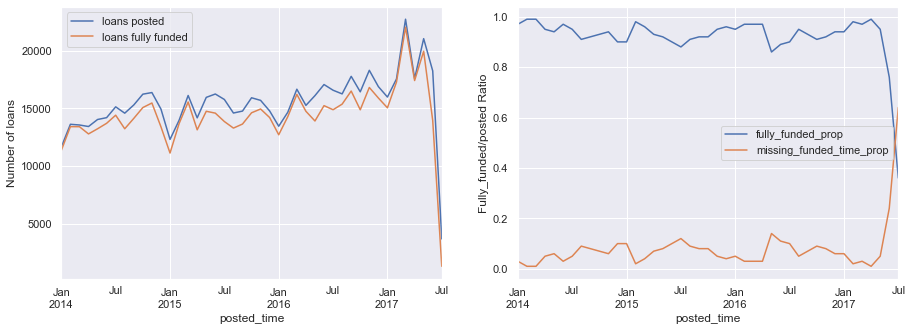

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# The number of loans posted and of the number of loans completely funded month by month
loans_monthly_count[['loans_posted', 'loans_fully_funded']].plot(ax=axes[0])
axes[0].legend(['loans posted', 'loans fully funded'])
axes[0].set_ylabel('Number of loans')

loans_monthly_count[['fully_funded_prop','missing_funded_time_prop']].plot(ax=axes[1])
_ = axes[1].set_ylabel('Fully_funded/posted Ratio')

In [61]:
loans_monthly_count.describe()

,loans_posted,loans_fully_funded,fully_funded_prop,missing_funded_time_prop
count,43.000000,43.000000,43.000000,43.000000
mean,15466.069767,14393.720930,0.920930,0.079070
std,2740.954747,2826.189352,0.096924,0.096924
min,3681.000000,1309.000000,0.360000,0.010000
25%,14378.000000,13403.000000,0.910000,0.035000
50%,15758.000000,14396.000000,0.940000,0.060000
75%,16490.000000,15290.000000,0.965000,0.090000
max,22711.000000,22015.000000,0.990000,0.640000


In [62]:
# Check the last 10 months
loans_monthly_count.tail(10)

,loans_posted,loans_fully_funded,fully_funded_prop,missing_funded_time_prop
posted_time,,,,
2016-10-31,16421,14865,0.91,0.09
2016-11-30,18284,16798,0.92,0.08
2016-12-31,16873,15886,0.94,0.06
2017-01-31,15968,15036,0.94,0.06
2017-02-28,17536,17268,0.98,0.02
2017-03-31,22711,22015,0.97,0.03
2017-04-30,17568,17399,0.99,0.01
2017-05-31,21027,19937,0.95,0.05
2017-06-30,18234,13937,0.76,0.24


It's obvious that the performance of last months in the dataset, 2017-07 and 2017-06, is very different from the previous months. Such low ratios of fully-funded loans to posted loans in the last two months result from the significantly increased missing values of `funded_time`. Before we handle the missing values in the last two months, let's check the statistics of the fully funded days

In [63]:
loans_others.fully_funded_days.describe()

count    618933.000000
mean         14.482962
std          14.108709
min           0.001389
25%           5.152674
50%           9.522847
75%          22.320324
max         420.573264
Name: fully_funded_days, dtype: float64

The days of a loan getting fully funded range from less than 1 day to 420 days. According to [Kiva website](https://www.kiva.org/about/how), loans on Kiva usually have 30 days to successfully fundraise, and Kiva have expanded funding options for those loans missing their funding goals.

48.06939814814815

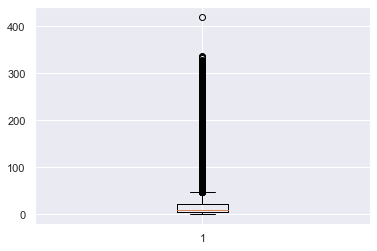

In [64]:
B = plt.boxplot(loans_others[loans_others.fully_funded_days > 0].fully_funded_days)
[item.get_ydata() for item in B['whiskers']][1][1]

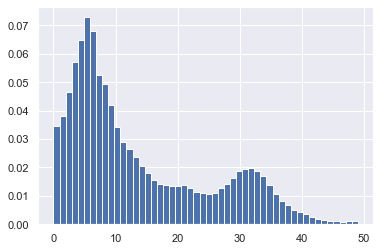

In [65]:
loans_others[loans_others.fully_funded_days < 49 ].fully_funded_days.hist(bins=50, density=True)

The upper bar of the box plot, i.e., `Q3 + 1.5 * IQR`, is about 48 days. Generally , we can consider the value higher than the upper bar as outliers. In another word, the fully funded days that is less than 48 days can be considered as normal. So we will drop the all the loans posted in the last 48 days, i.e., the loans posted after `2017-06-07`.

In [66]:
loans_others = loans_others.loc[loans_others.posted_time.dt.date <= dt(2017,6,7).date(), :]
loans_others.tail(2)

,id,funded_amount,loan_amount,activity,sector,use,ISO,country,partner_id,posted_time,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,fully_funded_days,world_region,MPI,funded_speed,loan_amount_per_month
653342,1315513,175.0,1675.0,Farming,Agriculture,"to buy fertilizer for her crops, and hire workers to help increase her farm's output.",KHM,Cambodia,With_partner,2017-06-07 10:59:42,...,13.0,7,"#Elderly, #Vegan, #Woman Owned Biz, #Repeat Borrower, #Job Creator",female,monthly,NaN,East Asia and the Pacific,0.146371,NaN,129.0
653343,1315135,675.0,675.0,Medical Clinic,Health,to buy an ultrasonography machine for her clinic.,PAK,Pakistan,With_partner,2017-06-07 05:55:26,...,14.0,22,"#Elderly, #Health and Sanitation, #Technology, #Woman Owned Biz, #Parent, #Biz Durable Asset, user_favorite",female,monthly,8.511377,South Asia,0.230320,79.3,48.0


In [67]:
loans_others.fully_funded_days.isna().mean()

0.06136853406659612

Since we don't know how long would Kiva expand a loan which didn't get fully funded in 30 days, here we impute the missing values of `fully_funded_days` with 48 days.

In [68]:
loans_others.fully_funded_days.fillna(48, inplace=True)

In [69]:
loans_others.fully_funded_days.isna().sum()

0

In [70]:
loans_others = loans_others.rename({'fully_funded_days':'funded_days'}, axis=1)

## Taeget feature

### The speed of the crowd-funding

In [71]:
loans_others.loc[:, 'funding_speed'] = round(loans_others.funded_amount / loans_others.funded_days)

In [72]:
loans_others.funding_speed.describe()

count    647335.000000
mean        161.112401
std        1218.394127
min           0.000000
25%          20.000000
50%          42.000000
75%          97.000000
max      227368.000000
Name: funding_speed, dtype: float64

212.0

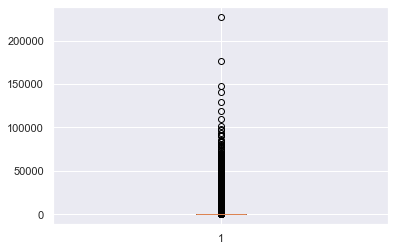

In [73]:
B = plt.boxplot(loans_others.funding_speed)
[item.get_ydata() for item in B['whiskers']][1][1]

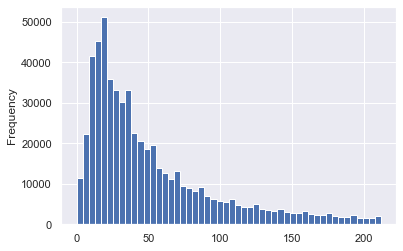

In [74]:
loans_others[loans_others.funding_speed < 213].funding_speed.plot.hist(bins=50)

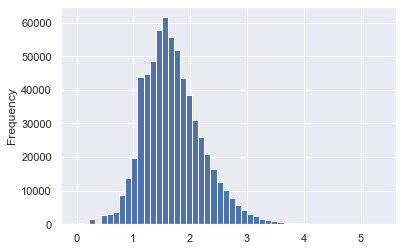

In [75]:
np.log10(loans_others.funding_speed+1).plot.hist(bins=50)

In [76]:
np.corrcoef(loans_others.funding_speed, loans_others.loan_amount)

array([[1.        , 0.10831269],
       [0.10831269, 1.        ]])

## Save processed data

### Drop the entries without MPI value

In [90]:
loans_others.drop(index=loans_others[loans_others.country.apply(lambda x: x in country_wo_mpi)].index, inplace=True)

loans_others.MPI.isna().sum()

### Save processed data

In [94]:
# Save the processed data
loans_others.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/loans_others.cvs' ,index=False, date_format='%Y-%m-%d %H:%M:%S')